In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import seaborn as sns
import pandas as pd
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [7]:
%matplotlib inline

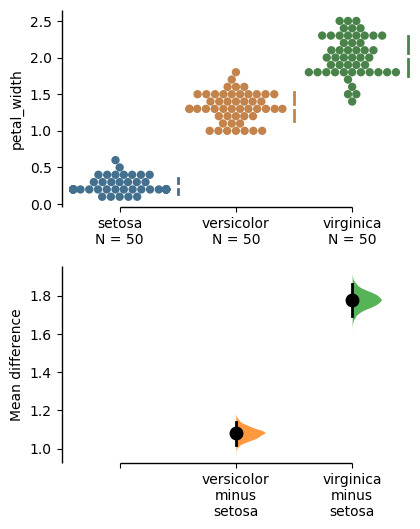

In [8]:
import pandas as pd
import dabest

# Load the iris dataset. Requires internet access.
iris = pd.read_csv("https://github.com/mwaskom/seaborn-data/raw/master/iris.csv")

# Load the above data into `dabest`.
iris_dabest = dabest.load(data=iris, x="species", y="petal_width",
                          idx=("setosa", "versicolor", "virginica"))

# Produce a Cumming estimation plot.
iris_dabest.mean_diff.plot();

In [10]:
ca1_fn_dist_fp=r'D:\DATA\analysis\15lapstandarded\novel_2days_cor\ca1_2day_cor.mat'
ca3_fn_dist_fp=r'D:\DATA\analysis\15lapstandarded\novel_2days_cor\ca3_2day_cor.mat'
CA1_cor_data = scipy.io.loadmat(ca1_fn_dist_fp)
CA3_cor_data = scipy.io.loadmat(ca3_fn_dist_fp)

In [12]:
for t in range(6):
    print(t)
    if t==0:
        new_pd_dict = [{'cor': CA1_cor_data['total_2day_cor'][0][i], 'type':'CA1','condition':'ff','region':'CA1'} for i in range(len( CA1_cor_data['total_2day_cor'][0]))]# for j in range(N_trial)]
    elif t==1:
        new_pd_dict += [{'cor': CA3_cor_data['total_2day_cor'][0][i], 'type':'CA3','condition':'fn','region':'CA3'} for i in range(len( CA3_cor_data['total_2day_cor'][0]))]
        
    new_pd_result = pd.DataFrame(new_pd_dict)   

0
1
2
3
4
5


DABEST v0.3.0
             
Good evening!
The current time is Sat May 16 21:55:54 2020.

The unpaired mean difference between CA1 and CA3 is 0.0819 [95%CI -0.00942, 0.162].
The p-value of the two-sided permutation t-test is 0.038. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

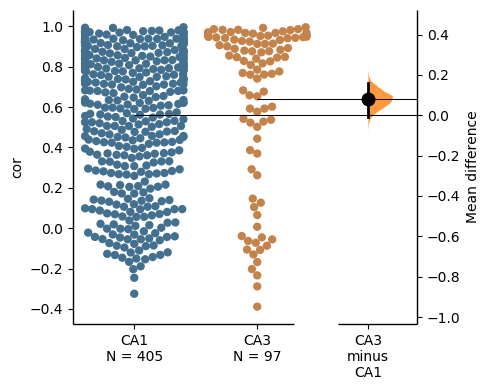

In [17]:
# Load the above data into `dabest`.
cor_dabest = dabest.load(data=new_pd_result, x="type", y="cor",
                          idx=("CA1", "CA3"))

# Produce a Cumming estimation plot.
cor_dabest.mean_diff.plot();
cor_dabest.mean_diff
#plt.savefig('CA1-CA3_cor_n2days_dabest.svg')

In [4]:
for t in range(6):
    print(t)
    if t==0:
        new_pd_dict = [{'cor': CA1_cor_data['total_2day'][0][i], 'type':'CA1n2n','condition':'ff','region':'CA1'} for i in range(len(CA1_cor_data['f_cor'][0]))]# for j in range(N_trial)]
    elif t==1:
        new_pd_dict += [{'cor': CA1_cor_data['total_cor'][0][i], 'type':'CA3n2nfn','condition':'fn','region':'CA1'} for i in range(len(CA1_cor_data['total_cor'][0]))]
    #elif t==2:
    #    new_pd_dict += [{'cor': CA1_cor_data['n_cor'][0][i], 'type':'CA1','condition':'nn'} for i in range(len(CA1_cor_data['n_cor'][0]))]
    
    #elif t==3:
        #new_pd_dict += [{'cor': CA3_cor_data['f_cor'][0][i], 'type':'CA3ff','condition':'ff','region':'CA3'} for i in range(len(CA3_cor_data['f_cor'][0]))]
    #elif t==4: 
        #new_pd_dict += [{'cor': CA3_cor_data['total_cor'][0][i], 'type':'CA3fn','condition':'fn','region':'CA3'} for i in range(len(CA3_cor_data['total_cor'][0]))]
    #elif t==5:
    #        new_pd_dict += [{'cor': CA3_cor_data['n_cor'][0][i], 'type':'CA3','condition':'nn'} for i in range(len(CA3_cor_data['n_cor'][0]))]
    new_pd_result = pd.DataFrame(new_pd_dict)            
        
        
#print(new_pd_dict)        
print(new_pd_result)

0
1
2
3
4
5
           cor   type condition region
0     0.770945  CA1ff        ff    CA1
1     0.995589  CA1ff        ff    CA1
2     0.995561  CA1ff        ff    CA1
3     0.831534  CA1ff        ff    CA1
4     0.894082  CA1ff        ff    CA1
...        ...    ...       ...    ...
4689  0.390919  CA3fn        fn    CA3
4690  0.566878  CA3fn        fn    CA3
4691  0.878372  CA3fn        fn    CA3
4692  0.384012  CA3fn        fn    CA3
4693  0.834003  CA3fn        fn    CA3

[4694 rows x 4 columns]


In [8]:
new_pd=new_pd_result[new_pd_result['condition']=='ff']
new_pd

,cor,type,condition
0,0.798454,CA1,ff
1,0.982383,CA1,ff
2,0.991006,CA1,ff
3,0.403047,CA1,ff
4,0.705849,CA1,ff
...,...,...,...
5182,0.999473,CA3,ff
5183,0.416191,CA3,ff
5184,0.831531,CA3,ff
5185,0.997440,CA3,ff


In [5]:

model = ols('cor ~ condition+region+condition:region', new_pd_result).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 3, 4690) =  2624.187, p =  0.0000


In [6]:
import scikit_posthocs
print('ff')
print(scikit_posthocs.posthoc_dunn(new_pd_result[new_pd_result['condition']=='ff'], 'cor', 'type'))

print('fn')
print(scikit_posthocs.posthoc_dunn(new_pd_result[new_pd_result['condition']=='fn'], 'cor', 'type'))

print('nn')
print(scikit_posthocs.posthoc_dunn(new_pd_result[new_pd_result['condition']=='nn'], 'cor', 'type'))

ff
              CA1ff         CA3ff
CA1ff -1.000000e+00  3.086675e-42
CA3ff  3.086675e-42 -1.000000e+00
fn
          CA1fn     CA3fn
CA1fn -1.000000  0.850803
CA3fn  0.850803 -1.000000
nn
Empty DataFrame
Columns: []
Index: []


In [11]:
res2 = sm.stats.anova_lm(model, typ= 2)
print(res2)


# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(new_pd_result['cor'],
                            new_pd_result['type'])
#MultiComp2 = MultiComparison(new_pd_result[new_pd_result['type']=='CA3']['cor'],
#                            new_pd_result[new_pd_result['type']=='CA3']['condition'])




# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd().summary())
#print('CA3')
#print(MultiComp2.tukeyhsd().summary())


                      sum_sq      df            F    PR(>F)
condition         689.770610     1.0  7863.252254  0.000000
region              2.025624     1.0    23.091719  0.000002
condition:region    0.816409     1.0     9.306904  0.002296
Residual          411.410452  4690.0          NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 CA1ff  CA1fn  -0.7836  0.001 -0.8095 -0.7577   True
 CA1ff  CA3ff   0.0963  0.001  0.0492  0.1435   True
 CA1ff  CA3fn  -0.7555  0.001 -0.7908 -0.7202   True
 CA1fn  CA3ff     0.88  0.001  0.8346  0.9253   True
 CA1fn  CA3fn   0.0281 0.1253 -0.0048   0.061  False
 CA3ff  CA3fn  -0.8519  0.001 -0.9032 -0.8005   True
----------------------------------------------------


RanksumsResult(statistic=-7.8269283892050465, pvalue=4.999336550884233e-15)

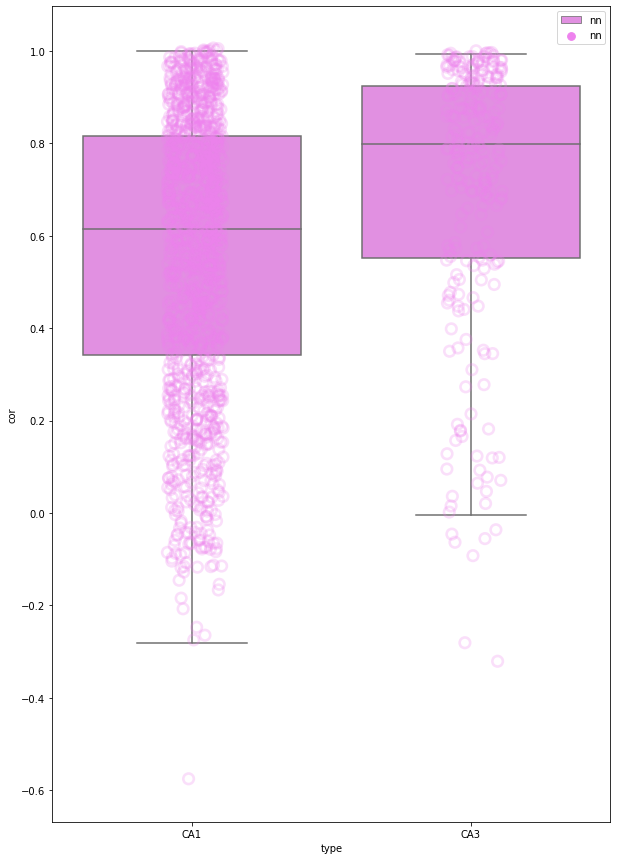

In [29]:
plt.figure(figsize=(10,15))
ax = sns.boxplot(x="type", y="cor", hue="condition",
                   data=new_pd_result[new_pd_result['condition']=='nn'], palette=["violet"], dodge=True,showfliers=False)
ax = sns.stripplot(x="type", y="cor",  palette=["violet"],hue="condition",
                   data=new_pd_result[new_pd_result['condition']=='nn'],marker="$\circ$",size=20,dodge=True,
                   alpha=0.25)
ax.legend()
stats.ranksums(CA1_cor_data['n_cor'][0],CA3_cor_data['n_cor'][0])

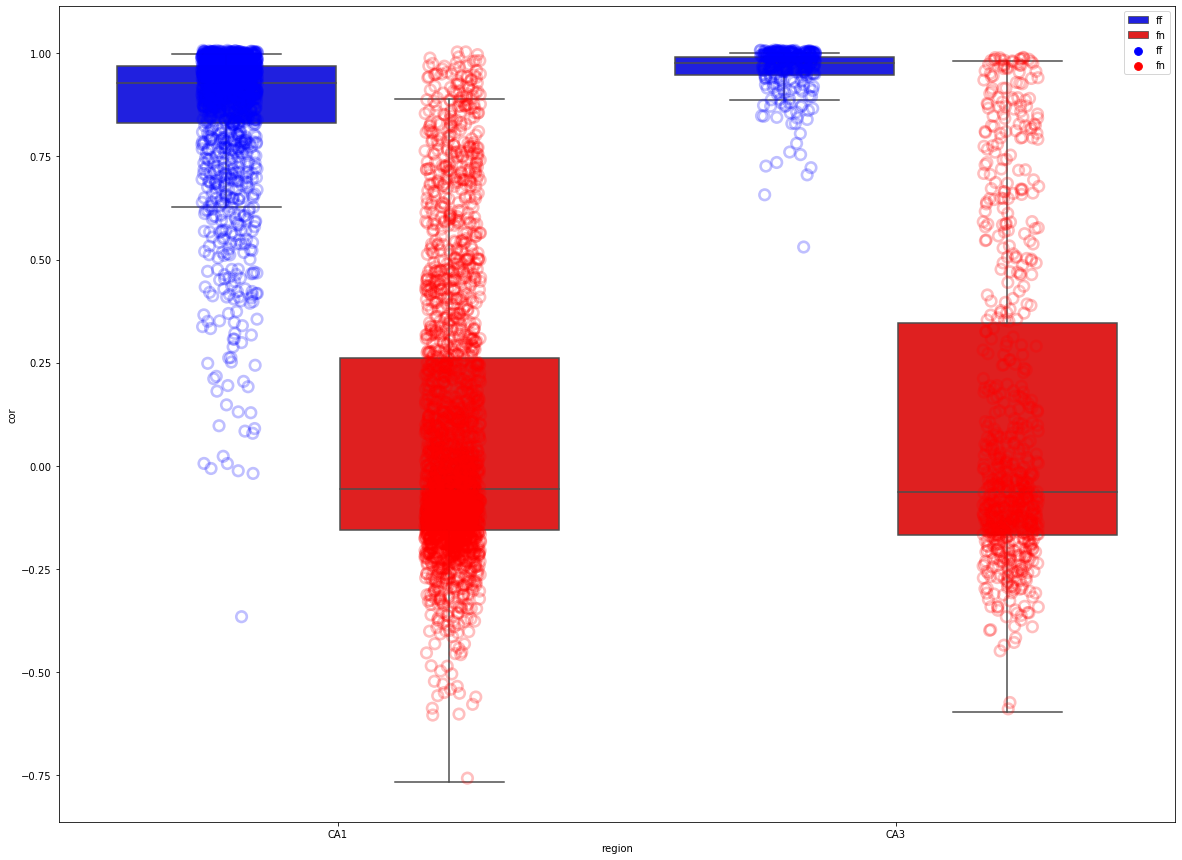

In [13]:
#ax = sns.stripplot(x="type", y="cor", data=new_pd_result[new_pd_result.condition=='n'])
plt.figure(figsize=(20,15))
ax = sns.boxplot(x="region", y="cor", hue="condition",
                   data=new_pd_result, palette=["blue","red"], dodge=True,showfliers=False)
ax = sns.stripplot(x="region", y="cor",  palette=["blue","red"],hue="condition",
                   data=new_pd_result,marker="$\circ$",size=20,dodge=True,
                   alpha=0.25)
ax.legend()
#plt.savefig('CA1-CA3_cor_v2.svg')
#print('CA1CA3f ransum p value '+str(stats.ranksums(CA1_cor_data['f_cor'][0],CA3_cor_data['f_cor'][0])[1]))
#print('CA1CA3f t test p value '+str(scipy.stats.ttest_ind(CA1_cor_data['f_cor'][0],CA3_cor_data['f_cor'][0])[1]))

#print('CA1CA3n ransum p value '+str(stats.ranksums(CA1_cor_data['n_cor'][0],CA3_cor_data['n_cor'][0])[1]))
#print('CA1CA3n t test p value '+str(scipy.stats.ttest_ind(CA1_cor_data['n_cor'][0],CA3_cor_data['n_cor'][0])[1]))
                                                                                         
#print('CA1fn ransum p value '+str(stats.ranksums(CA1_cor_data['f_cor'][0],CA1_cor_data['n_cor'][0])[1]))
#print('CA1fn t test p value '+str(scipy.stats.ttest_ind(CA1_cor_data['f_cor'][0],CA1_cor_data['n_cor'][0])[1]))

#print('CA3fn ransum p value '+str(stats.ranksums(CA3_cor_data['f_cor'][0],CA3_cor_data['n_cor'][0])[1]))
#print('CA3fn t test p value '+str(scipy.stats.ttest_ind(CA3_cor_data['f_cor'][0],CA3_cor_data['n_cor'][0])[1]))

In [11]:
ca1_fn_dist_fp=r'D:\DATA\analysis\15lapstandarded\delay_lap summary\CA1\ca1_cor_10-20lap.mat'
ca3_fn_dist_fp=r'D:\DATA\analysis\15lapstandarded\delay_lap summary\CA3\ca3_cor_10-20lap.mat'
CA1_cor_data = scipy.io.loadmat(ca1_fn_dist_fp)
CA3_cor_data = scipy.io.loadmat(ca3_fn_dist_fp)
for t in range(6):
    #print(t)
    if t==0:
        new_pd_dict = [{'cor': CA1_cor_data['f_cor'][0][i], 'type':'CA1ff','condition':'ff','region':'CA1'} for i in range(len(CA1_cor_data['f_cor'][0]))]# for j in range(N_trial)]
    elif t==1:
        new_pd_dict += [{'cor': CA1_cor_data['total_cor'][0][i], 'type':'CA1fn','condition':'fn','region':'CA1'} for i in range(len(CA1_cor_data['total_cor'][0]))]
    elif t==2:
        new_pd_dict += [{'cor': CA1_cor_data['n_cor'][0][i], 'type':'CA1nn','condition':'nn','region':'CA1'} for i in range(len(CA1_cor_data['n_cor'][0]))]
    
    elif t==3:
        new_pd_dict += [{'cor': CA3_cor_data['f_cor'][0][i], 'type':'CA3ff','condition':'ff','region':'CA3'} for i in range(len(CA3_cor_data['f_cor'][0]))]
    elif t==4: 
        new_pd_dict += [{'cor': CA3_cor_data['total_cor'][0][i], 'type':'CA3fn','condition':'fn','region':'CA3'} for i in range(len(CA3_cor_data['total_cor'][0]))]
    elif t==5:
        new_pd_dict += [{'cor': CA3_cor_data['n_cor'][0][i], 'type':'CA3nn','condition':'nn','region':'CA3'} for i in range(len(CA3_cor_data['n_cor'][0]))]
    new_pd_result = pd.DataFrame(new_pd_dict)            
        
        
#print(new_pd_dict)        
#print(new_pd_result)

No handles with labels found to put in legend.


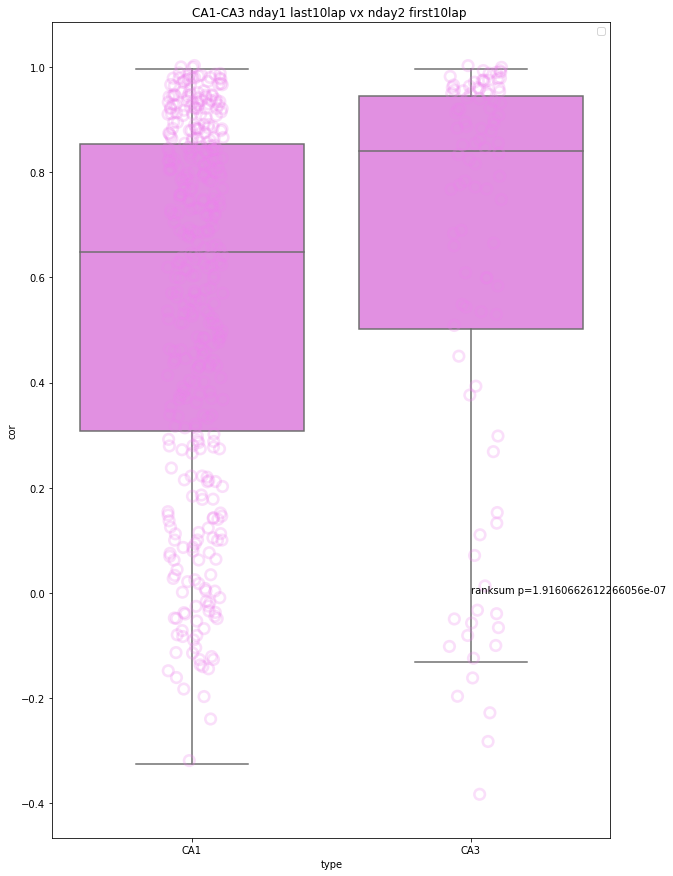

In [14]:
plt.figure(figsize=(10,15))
ax = sns.boxplot(x="type", y="cor", 
                   data=new_pd_result, palette=["violet"], dodge=True,showfliers=False)
ax = sns.stripplot(x="type", y="cor",  palette=["violet"],
                   data=new_pd_result,marker="$\circ$",size=20,dodge=True,
                   alpha=0.25)
ax.legend()
stats.ranksums(CA1_cor_data['total_2day_cor'][0],CA3_cor_data['total_2day_cor'][0])
ax.set_title('CA1-CA3 nday1 last10lap vx nday2 first10lap ')
ax.text(1,0,'ranksum p='+str(stats.ranksums(CA1_cor_data['total_2day_cor'][0],CA3_cor_data['total_2day_cor'][0])[1]))
#ax.text(1,-0.1,'ttest p='+str(scipy.stats.ttest_ind(CA1_cor_data['total_2day_cor'][0],CA3_cor_data['total_2day_cor'][0])[1]))
plt.savefig('CA1-CA3_cor_n2days.svg')

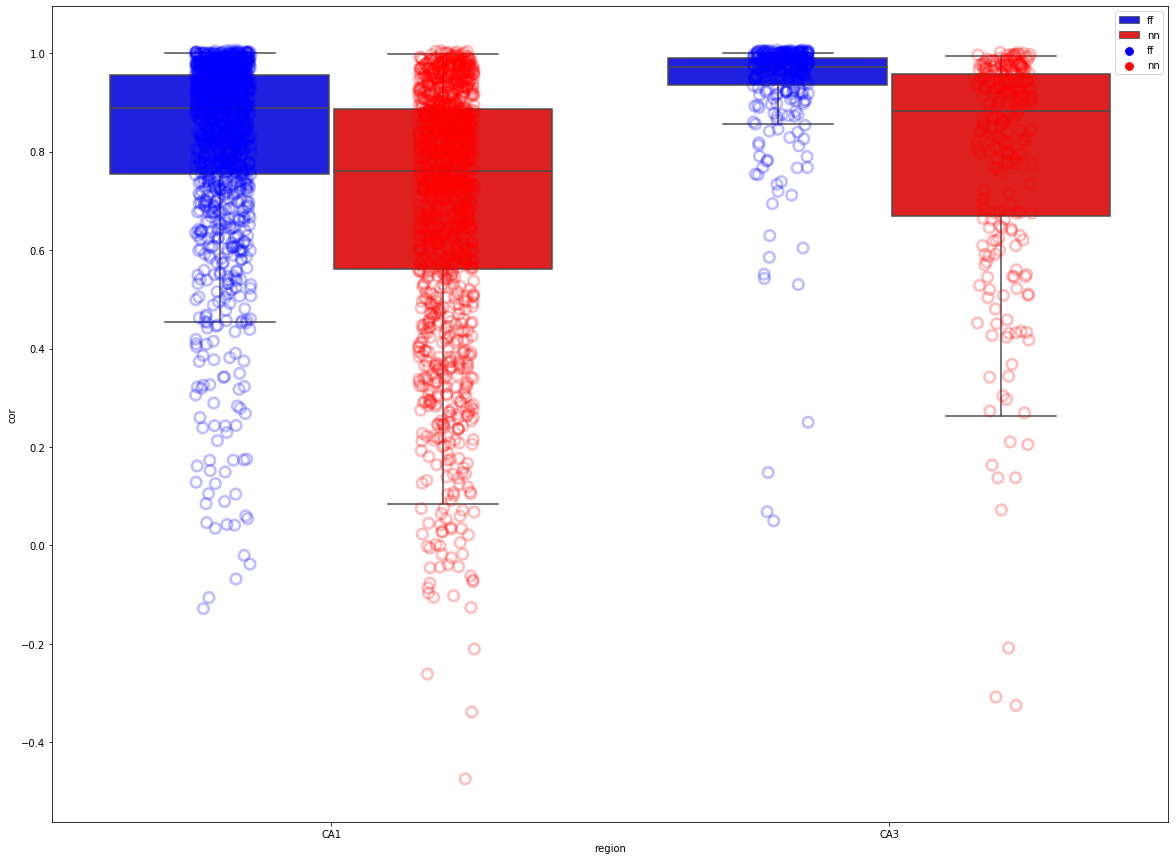

In [18]:
plt.figure(figsize=(20,15))
ax = sns.boxplot(x="region", y="cor", hue="condition",
                   data=new_pd_result[new_pd_result['condition']!='fn'], palette=["blue","red"], dodge=True,showfliers=False)
ax = sns.stripplot(x="region", y="cor",  palette=["blue","red"],hue="condition",
                   data=new_pd_result[new_pd_result['condition']!='fn'],marker="$\circ$",size=20,dodge=True,
                   alpha=0.25)
ax.legend()
plt.savefig('CA1-CA3_cor_ff_nn10-20.svg')

In [19]:
model = ols('cor ~ condition+region+condition:region', new_pd_result[new_pd_result['condition']!='fn']).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
res2 = sm.stats.anova_lm(model, typ= 2)
print(res2)


MultiComp = MultiComparison(new_pd_result[new_pd_result['condition']!='fn']['cor'],
                            new_pd_result[new_pd_result['condition']!='fn']['type'])


print(MultiComp.tukeyhsd().summary())

Overall model F( 3, 2986) =  134.128, p =  0.0000
                      sum_sq      df           F        PR(>F)
condition          13.616377     1.0  280.909142  2.500716e-60
region              5.044170     1.0  104.062437  4.837104e-24
condition:region    0.018947     1.0    0.390888  5.318809e-01
Residual          144.738975  2986.0         NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 CA1ff  CA1nn  -0.1327  0.001 -0.1557 -0.1097   True
 CA1ff  CA3ff   0.1109  0.001  0.0749   0.147   True
 CA1ff  CA3nn  -0.0347 0.1026 -0.0737  0.0044  False
 CA1nn  CA3ff   0.2436  0.001  0.2077  0.2795   True
 CA1nn  CA3nn    0.098  0.001  0.0591  0.1369   True
 CA3ff  CA3nn  -0.1456  0.001 -0.1934 -0.0978   True
----------------------------------------------------
